Feature engineering is about transforming raw data into a format that's more suitable for modeling. Even with a simple model like linear regression, certain transformations can be beneficial.

## 1. Data Loading:

In [45]:
# After turn project into a Package:
from src.data.data_loader import load_dataset
data = load_dataset("processed","cleaned_data.csv")

## 2. Data Exploration:

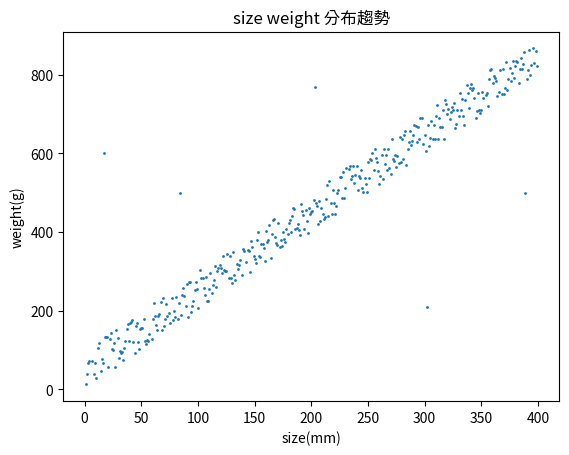

In [3]:

from src.visualization.data_plotter import DataPlotter
plotter = DataPlotter()
plotter.scatter_plot(data["size"], data["weight"], "size(mm)", "weight(g)", "size weight 分布趨勢", point_size=1)

## 3. Feature Creation:

#### 3.1. Visual Inspection

Scatter plots to identify non-linear patterns.
If you see a curve or non-linear trend, it suggests the potential benefit of polynomial features.

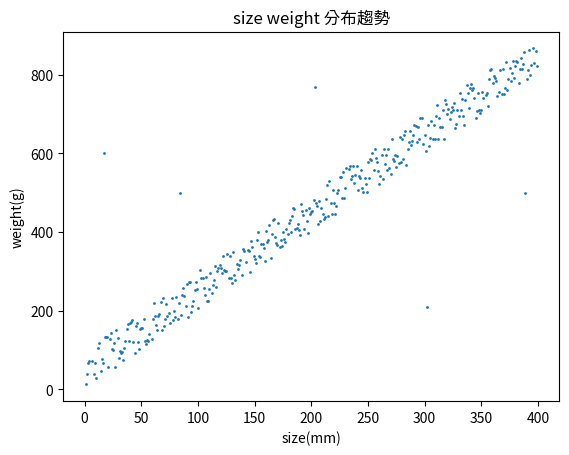

In [20]:
plotter.scatter_plot(data["size"], data["weight"], "size(mm)", "weight(g)", "size weight 分布趨勢", point_size=1)

### Despite the data is great linear relationship, pretend we think it might be polynomial relationships.

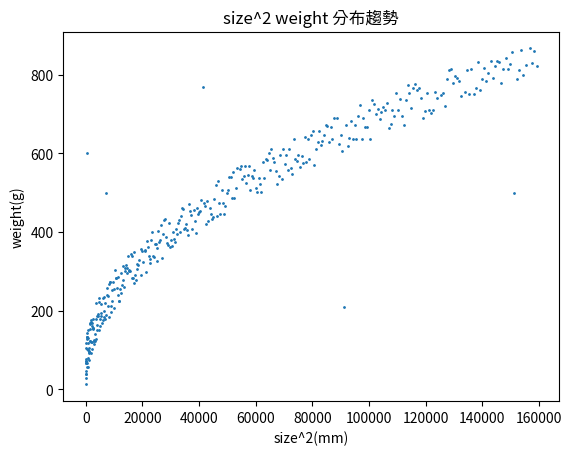

In [21]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=False)
poly_data=poly.fit_transform(data[["size"]])
poly_df=pd.DataFrame(poly_data,columns=poly.get_feature_names_out(["size"]))
poly_df = poly_df.drop("size", axis=1)
data_poly = pd.concat([data, poly_df], axis=1)

plotter.scatter_plot(data_poly["size^2"], data_poly["weight"], "size^2(mm)", "weight(g)", "size^2 weight 分布趨勢", point_size=1)

### Pretend we think it's work better than linear regression. So we have linear and quadratic two versions.

#### 3.2. Statistical Checks

Fit a simple linear regression/your gest better regression and plot residuals. Look for patterns in residuals.
By visually comparing the two plots, you can see which model's residuals are more randomly scattered around zero, indicating a better fit to the data.

Also, compute the Mean Squared Error (MSE) for both models to get a numerical understanding of the fit.
A lower MSE indicates a better fit to the data. If the quadratic model has a significantly lower MSE than the linear model, it provides further evidence in favor of the quadratic transformation.

Using both visual (residual plots) and quantitative (MSE) methods gives a comprehensive understanding of the effectiveness of the quadratic transformation.

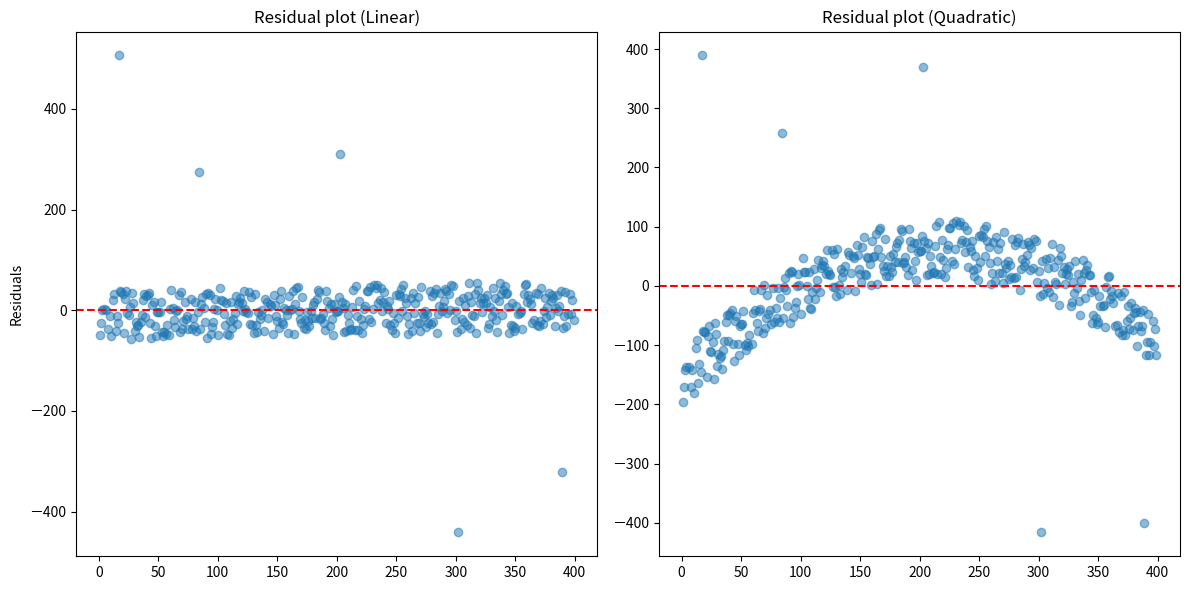

In [31]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

##
model_linear = LinearRegression()
model_linear.fit(data_poly[['size']], data_poly['weight'])
predictions_linear = model_linear.predict(data_poly[['size']])

# Calculate residuals for the linear model
residuals_linear = data_poly['weight'] - predictions_linear
##
# Fit a linear regression using the quadratic feature
model_quadratic = LinearRegression()
model_quadratic.fit(data_poly[['size^2']], data_poly['weight'])
predictions_quadratic = model_quadratic.predict(data_poly[['size^2']])

# Calculate residuals
residuals_quadratic = data_poly['weight'] - predictions_quadratic

##
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_poly['size'], residuals_linear, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')  
plt.title("Residual plot (Linear)")
plt.ylabel("Residuals")

plt.subplot(1, 2, 2)
plt.scatter(data_poly['size'], residuals_quadratic, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual plot (Quadratic)")

plt.tight_layout()
plt.show()

from sklearn.metrics import mean_squared_error

mse_linear = mean_squared_error(data_poly['weight'], predictions_linear)
mse_quadratic = mean_squared_error(data_poly['weight'], predictions_quadratic)

print(f"MSE for Linear Model: {mse_linear:.2f}")
print(f"MSE for Quadratic Model: {mse_quadratic:.2f}")

#### 3.3. Decision Based on Observations
Based on visual and statistical checks, decide whether to introduce polynomial (or other) features.

### Think the linear is ok! But if we still want to have more confidence about this, do below.

## 4. Model Testing:

Now that you've created potential features, you should test them within the context of a model to see how they influence predictive performance.

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split data for testing
train_size = int(0.7 * len(data_poly))
train_data = data_poly[:train_size]
test_data = data_poly[train_size:]

# Train a linear regression model on the original feature
model_original = LinearRegression()
model_original.fit(train_data[['size']], train_data['weight'])
preds_original = model_original.predict(test_data[['size']])
mse_original = mean_squared_error(test_data['weight'], preds_original)

model_quad = LinearRegression()
model_quad.fit(train_data[['size', 'size^2']], train_data['weight'])
preds_quad = model_quad.predict(test_data[['size', 'size^2']])
mse_quad = mean_squared_error(test_data['weight'], preds_quad)

print(f"Mean Squared Error for Linear Model: {mse_original}")
print(f"Mean Squared Error for Quadratic Model: {mse_quad}")

Mean Squared Error for Linear Model: 3389.9370682615076
Mean Squared Error for Quadratic Model: 52233.88555027169


## 5. Visualization:

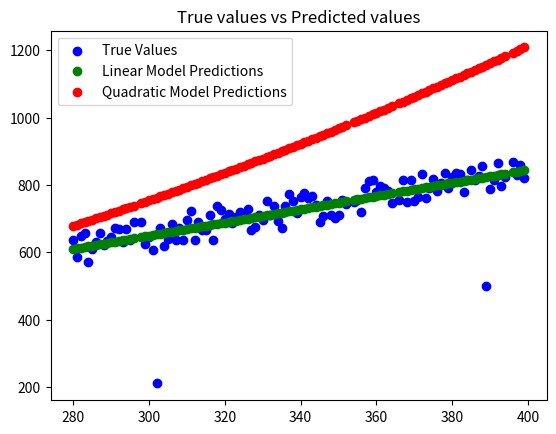

In [41]:
plt.scatter(test_data['size'], test_data['weight'], label='True Values', color='blue')
plt.scatter(test_data['size'], preds_original, label='Linear Model Predictions', color='green')
plt.scatter(test_data['size'], preds_quad, label='Quadratic Model Predictions', color='red')
plt.legend()
plt.title("True values vs Predicted values")
plt.show()

## 6. Decision Making:

Based on the MSE and the visualization, you can decide which features to keep. The decision is subjective and based on the trade-off between model simplicity and performance. For instance:

In [44]:
if mse_quad < mse_original:
    print("Polynomial features perform better. Consider using them!")
else:
    print("Original feature performs comparably or better. Stick with simplicity!")

Original feature performs comparably or better. Stick with simplicity!


## 5. Iterative Refinement:
If neither the linear nor quadratic model offers satisfactory performance, consider other feature engineering techniques or even different model types. This process is iterative, and sometimes revisiting previous steps with new insights can be beneficial.

## 6. Documentation:
Ensure that every step, decision, and observation is well-documented in your notebook. This is crucial for reproducibility and for conveying your thought process to others.